<a href="https://colab.research.google.com/github/kixtter/AnalisisInteligenteDatos/blob/main/Unidad%201/Caso_3_Analisis_Descriptivo_de_vacunaci%C3%B3n_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso 3. Análisis descriptivo de datos sobre aplicaciones de vacunas y fabricantes COVID

## Objetivo
Realizar un análisis descriptivo de frecuencias sobre los datos de aplicaciones de vacunas en distintos paísos y fabricantes de las mismas COVID.

## Descripción
Los datos de vacunación de COVID estan en la siguiente URL: (https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/country%20vaccinations%20by%20manufacturer.csv).
Origen de los datos: https://www.kaggle.com/

Resolver las siguientes necesidades de datos:
*   ¿Cuál país ha tenido mas aplicaciones a lo largo del tiempo?
*   ¿Cuál fabricante de vacunas ha tenido mas aplicaciones a lo largo del tiempo?
*   ¿Cuántas vacunas se han aplicado por país?
*   ¿Cuántas vacunas se han aplicado por fabricante?
*   ¿En que mes se ha aplicado mas vacunas?

Visualizar diagramas de barra por cada tipo de consulta, de las cinco preguntas visualizar diagramas de barras en donde el eje de las x es país o fabricante y el eje de las y es la frecuencia y/o suma de las aplicaciones.

# Desarrollo
## Cargar datos

In [1]:
import pandas as pd

vacunas = pd.read_csv('https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/country%20vaccinations%20by%20manufacturer.csv')
vacunas

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,31020
4,Austria,2021-01-15,Johnson&Johnson,0
...,...,...,...,...
10960,Uruguay,2021-08-07,Pfizer/BioNTech,1562360
10961,Uruguay,2021-08-07,Sinovac,3234519
10962,Uruguay,2021-08-08,Oxford/AstraZeneca,84121
10963,Uruguay,2021-08-08,Pfizer/BioNTech,1562430


En la carga y visuzaliación de datos podemos ver los primeros y últimos que contiene el conjunto, con esto podemos observar que existen casi 11,000 registros de vacunanción y cada uno cuenta hasta con más de 1 millón de vacunas aplicadas.

## Variables:
El conjunto de datos se interpreta como la cantidad de aplicaciones de vacunas a personas que se llevaron a cabo entre las fechas del 2021-01-08 al 2021-08-08, es decir 7 meses de recopilación de datos.

*   location: representa el país donde se aplicó la vacuna
*   date: la fecha en que se aplica en formato 'YYYY-MM-DD'
*   vaccine: representa el fabricante de la vacuna
*   total_vaccinations: la cantidad de vacunas que se aplicaron en esa


## Frecuencia de aplicaciones por país

*   ¿Cuál país ha tenido más aplicaciones a lo largo del tiempo?



In [2]:
from numpy.ma.core import sort

frec_pais = vacunas.groupby(['location']).count()
print(frec_pais)

               date  vaccine  total_vaccinations
location                                        
Austria         124      124                 124
Belgium         104      104                 104
Bulgaria        107      107                 107
Chile           565      565                 565
Croatia         116      116                 116
Cyprus          100      100                 100
Czechia         744      744                 744
Denmark          95       95                  95
Estonia         105      105                 105
Finland         127      127                 127
France          712      712                 712
Germany         900      900                 900
Hong Kong       336      336                 336
Hungary         158      158                 158
Iceland         884      884                 884
Ireland         113      113                 113
Italy           746      746                 746
Japan           225      225                 225
Latvia          749 

Con los datos de arriba podemos observar los países que han sido vacunados y la cantidad de veces que fueron registrados como vacunados, en su mayoría podemos ver son países europeos

## Ordenando frecuencias

In [4]:
frec_pais_orden = frec_pais.sort_values('total_vaccinations', ascending = False)
print(frec_pais_orden)

               date  vaccine  total_vaccinations
location                                        
Germany         900      900                 900
Iceland         884      884                 884
Latvia          749      749                 749
Italy           746      746                 746
Czechia         744      744                 744
Lithuania       731      731                 731
France          712      712                 712
Romania         669      669                 669
Chile           565      565                 565
United States   556      556                 556
Uruguay         489      489                 489
Switzerland     454      454                 454
Hong Kong       336      336                 336
Japan           225      225                 225
Hungary         158      158                 158
Netherlands     128      128                 128
Poland          128      128                 128
Finland         127      127                 127
Austria         124 

Podemos observar como al ordenar los valores de frecuencia de vacunación de mayor a menos que los primeros 5 lugares estan entre los 740-900 veces en aplicación de vacunas, podemos decir que fueron los más afectados por el virus o los que más precaución tuvieron.

## Visualizando frecuencias
### Top 5 mayor frecuencia
Se muestra el top cinco de los registros de los países con más aplicaciones de vacunas en fechas diferentes

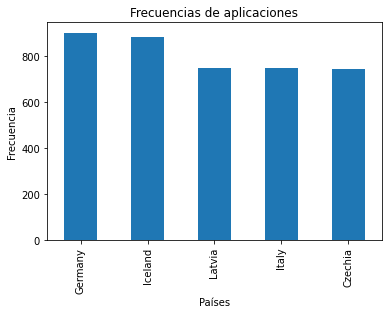

In [5]:
frec_pais_orden.head()['date'].plot(kind='bar', title='Frecuencias de aplicaciones', xlabel='Países', ylabel='Frecuencia')

Podemos ver cuales con los países con mayor frecuencia de aplicación de vacunas, siendo estos todos europeos, estando a la cabeza Alemania

### Top 5 menor frecuencia
Países con menos aplicaciones en fecha diferentes

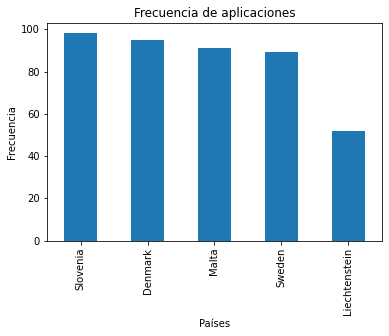

In [6]:
frec_pais_orden.tail()['date'].plot(kind='bar', title='Frecuencia de aplicaciones', xlabel='Países', ylabel='Frecuencia')

Podemos observar cuales son los paises con menor aplicación, ya sea porque el virus no tuvo fuerte presencia o porque no fue muy bien aceptada la vacunación.

## Frecuencia de aplicaciones por fabricante

2.   ¿Cuál fabricante de vacunas ha tenido más aplicaciones a lo largo del tiempo?



In [7]:
frec_fabr = vacunas.groupby(['vaccine']).count()
print(frec_fabr)

                    location  date  total_vaccinations
vaccine                                               
CanSino                   64    64                  64
Johnson&Johnson         1658  1658                1658
Moderna                 2765  2765                2765
Oxford/AstraZeneca      2345  2345                2345
Pfizer/BioNTech         3556  3556                3556
Sinopharm/Beijing         25    25                  25
Sinovac                  513   513                 513
Sputnik V                 39    39                  39


Podemos observar a todos los fabricantes de vacunas se han sido usado hasta el momento y la frecuencia de aplicación de estos

## Ordenando frecuencias

In [10]:
frec_fabr_orden = frec_fabr.sort_values('total_vaccinations', ascending = False)
print(frec_fabr_orden)

                    location  date  total_vaccinations
vaccine                                               
Pfizer/BioNTech         3556  3556                3556
Moderna                 2765  2765                2765
Oxford/AstraZeneca      2345  2345                2345
Johnson&Johnson         1658  1658                1658
Sinovac                  513   513                 513
CanSino                   64    64                  64
Sputnik V                 39    39                  39
Sinopharm/Beijing         25    25                  25


Podemos ver como la vacuna Pfizer/BioNTech es la mas usada para poder enfrentar al virus y la Sinopharm/Beijing siendo la menos utilizada ya sean esos números por la aceptación de las personas por alguna vacuna en concreto, la facilidad de distribución y producción de ambas o por su nivel de efectividad.

## Visualización de frecuencias

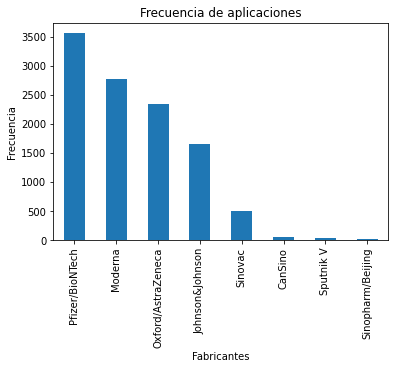

In [11]:
frec_fabr_orden['date'].plot(kind='bar', title='Frecuencia de aplicaciones', xlabel='Fabricantes', ylabel='Frecuencia')

De forma visual podemos ver como la vacuna Pfizer es por mucho la más usada contra el virus haciendo que exista la posibilidad de que con el tiempo sea la más usada en el mercado.

## Suma de aplicaciones de vacunas por país

3.   ¿Cuántas vacunas se ha aplicado por país?

In [13]:
pais_sum = vacunas.groupby(['location']).sum('total_vaccinations')
print(pais_sum)

               total_vaccinations
location                         
Austria                 118511334
Belgium                 162354528
Bulgaria                 27931197
Chile                  2629159998
Croatia                  38864087
Cyprus                   12211016
Czechia                 840566515
Denmark                  75191003
Estonia                  15626971
Finland                  68408812
France                 5540732366
Germany                7657809082
Hong Kong               382021660
Hungary                 164704986
Iceland                  38744648
Ireland                  52553510
Italy                  5418168374
Japan                  3910422920
Latvia                  111034630
Liechtenstein              451823
Lithuania               240077306
Luxembourg                7664316
Malta                     9976920
Netherlands             234720727
Poland                  438336578
Portugal                145482899
Romania                1037741287
Slovakia      

Ahora podemos observar por país la cantidad de vacunas que fueron aplicadas en el periodo Enero-Ago 2021 siendo miles de millones las aplicaciónes tratando de cubrir a tantas personas no fuera posible.

## Ordenando Datos

In [14]:
pais_sum_orden = pais_sum.sort_values('total_vaccinations', ascending=False)
print(pais_sum_orden)

               total_vaccinations
location                         
United States         41524152779
Germany                7657809082
France                 5540732366
Italy                  5418168374
Japan                  3910422920
Chile                  2629159998
Romania                1037741287
Czechia                 840566515
Switzerland             736032309
Spain                   651194863
Poland                  438336578
Uruguay                 397732230
Hong Kong               382021660
Lithuania               240077306
Netherlands             234720727
Hungary                 164704986
Belgium                 162354528
Portugal                145482899
Sweden                  128990325
Austria                 118511334
Latvia                  111034630
Denmark                  75191003
Finland                  68408812
Slovakia                 56050405
Ireland                  52553510
Croatia                  38864087
Iceland                  38744648
Bulgaria      

Como veiamos arriba el país con mas frecuencia de aplicación fue Alemania pero el país con la mayor cantidad de vacunas aplicadas fue Estados Unidos superando los 41 mil millones podemos ver como este país de ha dado mucha importancia a la salud de sus ciudadanos así como volver lo más pronto posible a una normalidad.

## Visualizando Datos
Se visualiza la suma de los vacunados por país
### Top 5 más vacunados

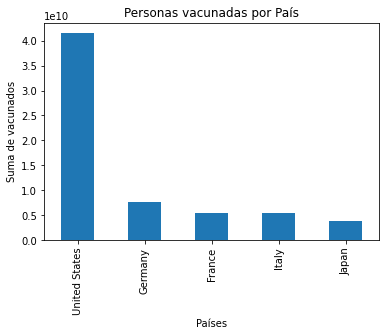

In [15]:
pais_sum_orden.head()['total_vaccinations'].plot(kind='bar', title='Personas vacunadas por País', xlabel='Países', ylabel='Suma de vacunados')

Dentro de top 5 de países con mayor cantidad de vacunaciones, Estados Unidos supera por mucho a los demás haciendo parecer que los demás países no le dan la importancia necesaria a la salud de sus ciudadanos

### Top 5 menos vacunados

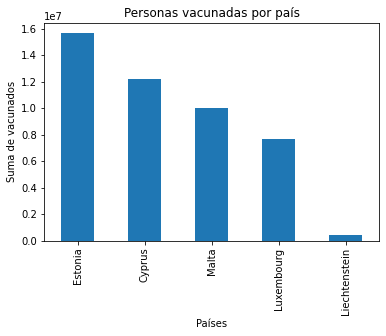

In [16]:
pais_sum_orden.tail()['total_vaccinations'].plot(kind='bar', title='Personas vacunadas por país', xlabel='Países', ylabel='Suma de vacunados')

Así como hay países que han registrado una gran cantidad de vacunación también hay países que no tienen una gran cantidad de vacunados siendo estos con 15 millones hacia abajos en cantidad de vacunación, sigue siendo un número bastante alto, se puede pensar que estos países no hay muchos contagios o no consideran de gran importancia la vacuna

## Suma de aplicaciones por fabricante

4.   ¿Cuántas vacunas se han aplicado por fabricante?


In [17]:
fabr_sum = vacunas.groupby(['vaccine']).sum('total_vaccinations')
print(fabr_sum)

                    total_vaccinations
vaccine                               
CanSino                       22498727
Johnson&Johnson             1748108075
Moderna                    20286391475
Oxford/AstraZeneca          3631156763
Pfizer/BioNTech            44569701150
Sinopharm/Beijing             34668398
Sinovac                     2572589889
Sputnik V                     29611165


Podemos observar la cantidad de vacunados que hay por fabricante, los numeros superan los millones lo cual es un buen indicio de que la vacunación va sin problemas en especial en países europeos ya que son mayoría en este conjunto de datos

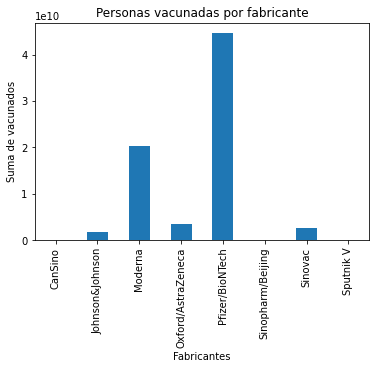

In [18]:
fabr_sum['total_vaccinations'].plot(kind='bar', title='Personas vacunadas por fabricante', xlabel='Fabricantes', ylabel='Suma de vacunados')

Podemos ver como Pfizer es el dominante con respecto a la aplicación de vacunas hasta puede considerarse que será el que controle el mercado de vacunación en los siguientes meeses.

## Suma de aplicaciones por meses

5.   ¿En qué mes se han aplicado más vacunas?

In [20]:
import datetime as dt

vacunas['date'] = pd.to_datetime(vacunas['date'])
mes_sum = vacunas.groupby(vacunas['date'].dt.month).sum('total_vaccinations')
print(mes_sum)

      total_vaccinations
date                    
1              452121623
2             1883457386
3             4765802019
4             8608005615
5            12963339621
6            17070467058
7            21745775771
8             5404963283
12                793266


Por mes podemos ver la cantidad de vacunas aplicadas, como este solo contiene fechas que estan entre Enero y Agosto podemos que julio es el mes con más vacunas y luego le siguien junio y mayo, puede verse que en esos meses es cuando hubó algún pico de contagiados por el virus.

## Visualización de datos

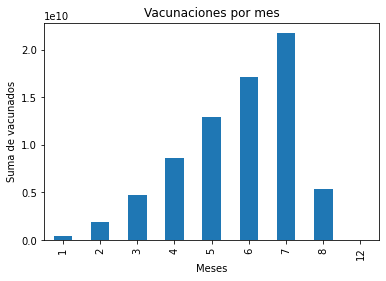

In [21]:
mes_sum['total_vaccinations'].plot(kind='bar', title='Vacunaciones por mes', xlabel='Meses', ylabel='Suma de vacunados')

Podemos ver como con el paso de los meses la cantidad de vacunados va incrementando ya sea por un nuevo pico de contagios o porque hay más conciencia sobre la gravedad del virus